# Assignment 0: Data Exploration

Your UTCS accounts come with `python` installed but you can’t add packages to it (without root). Especially installing `scipy` and `numpy` on your own can be painful. We recommend using a local install of python, so that you can add any packages you need easily. We will use the python 3 version of [Anaconda](https://docs.continuum.io/), an open-source package and environment manager optimized for data science applications. It’s maintained by the Austin-based company Anaconda.

## Part 1: Setting up your Jupyter Notebook

You may have unforeseen difficulties with this portion of the assignment (not enough disk space, issues with permissions or package versions, conflicts with your personal `.bashrc` or `.zshrc` etc). 
**Please start early** and work with the TAs (during office hours) or other classmates to resolve these.

### Installing Anaconda on personal computers

* Make sure you have 2.5 GB free space available before you start installing. Use `baobab` to clear unused files and Chrome’s `.config` litter.
* Download the Anaconda - Python 3.6 zip archive from the [official website](https://www.anaconda.com/download/#download). This file is `~500 MB`, and the uncompressed version will be `~2 GB`.

~~~~
$ wget https://repo.continuum.io/archive/Anaconda3-4.4.0-Linux-x86_64.sh
# current as of this assignment
$ bash Anaconda3-4.4.0-Linux-x86_x64.sh
~~~~

* Accept the license agreement and select an installation directory. (Note that the install location defaults to `~/anaconda3`)
* It will take a few minutes to install. Please be patient.
* It will ask you whether to add it to your bash path (your `~/.bashrc` file). Note that the default is “no”. We recommend saying **yes**.
* Start a **new terminal**. Let’s make sure we’re using Anaconda’s Python we just installed.

~~~~
$ which python
/u/pkar/anaconda3/bin/python
# Note:- your username will appear in the path. Mine is 'pkar'.
~~~~

* Let’s start a notebook server.

~~~~
$ jupyter notebook
~~~~

* It should open a browser tab and start a local server.

<img src="imgs/screen1.png">

* Create a directory for this course (I called mine CS363), and make a new Python 3 notebook.
* Have a go at using the notebook interface. We’ll see more of what we can do with Jupyter notebooks in Part 2.

### Installing Jupyter notebooks on lab computers

The Anaconda install is too large for your allocated space in the computer lab. But you can still install Jupyter in the lab without installing Anaconda.

First log into your favorite cs linux machine. Almost all required packages are already installed on those machines.

~~~~
pip3 install --user jupyter
~~~~

Let’s fire up jupyter:

~~~~
ipython3 notebook --no-browser
~~~~

If you’re logged in locally open a browser at the url printed out. Otherwise port forward

~~~~
ssh -NL PORT:localhost:PORT SERVER
~~~~

You can figure out the `PORT` from the url provided by ipython. `SERVER` is the url of the machine you started ipython on.

Pro tip: If you want ipython to survive your SSH login, start it in a screen session.

*Note: This guide is inspired from Prof. Philip Krähenbühl's Neural Network course ([CS 342](http://www.philkr.net/cs342/homework/01/install.html)).*

### Additional Links

* [Stanford CS 231N iPython Tutorial](http://cs231n.github.io/ipython-tutorial/)
* [Jupyter Notebook Beginner Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/)
* [Datacamp Jupyter Notebook Tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook#gs.PV0TCww)

## Part 2: Leaf Dataset

For this task we'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

You can find more information about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Leaf).

<img src="imgs/screen4.png">

In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

pd.__version__

'0.23.4'

Read in the dataset. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [2]:
leaf_data = pd.read_csv("leaf.csv")
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q1. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. How many missing values are there in this column?

In [3]:
non_NA = leaf_data['eccentricity'].count()
a = leaf_data['eccentricity'].isna()
total = a.count()
num_missing = total - non_NA
num_missing

5

Q2. Fill in these missing values with something reasonable. Show the head of the dataframe.

In [4]:
#Replaces the NA values with the average eccentricity of the class that it is in
av_ecc = leaf_data.groupby('class').mean()['eccentricity']
for i in range(0,total):
    if( a[i] ):
        leaf_data.iat[i,1] = av_ecc[leaf_data.iat[i,0]]
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.415627,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q3. Standardize the `eccentricity` column. Where `value_std = (value - mean(value)) / std(value)`. Display the head of the new data frame.

In [5]:
leaf_list = []
sum = 0
mean = leaf_data.mean()['eccentricity']
std = leaf_data.std()['eccentricity']
std_eccentricity = leaf_data['eccentricity'].copy()
for i in range(0,total):
    std_eccentricity[i] = (std_eccentricity[i]-mean)/std
leaf_data.insert(2,'standard-eccentricity',std_eccentricity)
leaf_data.head()

,class,eccentricity,standard-eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.415627,-0.596808,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,1.698384,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,-1.479077,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,-0.175021,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,-0.925888,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q4. Plot a scatter plot between `smoothness` and standardized `eccentricity`. Place `smoothness` on the X axis.

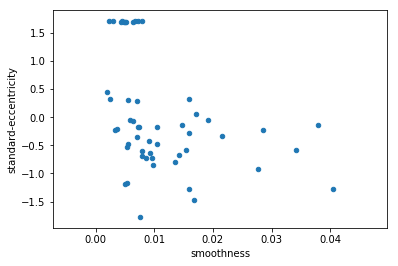

In [6]:
leaf_data.plot.scatter(x='smoothness',y='standard-eccentricity')

Q5. Now plot the same scatter plot as Q8 but give a different color to each `class` label. What can you infer from this plot? (Provide a short answer in the form of comments.)

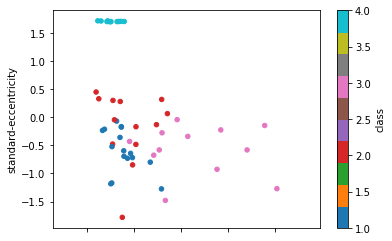

In [7]:
leaf_data.plot.scatter(x='smoothness',y='standard-eccentricity',c='class',colormap='tab10')

#From this, we can see that class 4 generally has a much higher eccentricty than the other classes, but also has a low 
#smoothness.
#Class 3 seems to have a very wide range of eccentricities and smoothnesses, with no correlation between the two.
#Classes 1 and 2 seem to have a low smoothness with varying eccentricies. 
#There seems to be an outlier for class 2 with a very low eccentricity.

Q6. Calculate the correlation between the standardized `eccentricity` and the `smoothness` column. 

In [8]:
leaf_data.corr().at['smoothness','standard-eccentricity']

-0.3853420406550328

Q7. Create a plot to determine if there are any outliers in the `average-contrast` attribute.

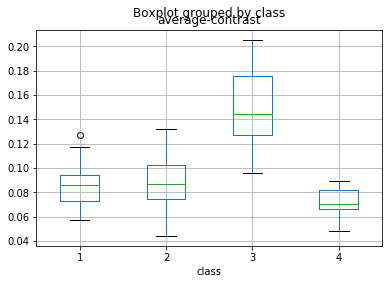

In [22]:
leaf_data.boxplot(column = 'average-contrast', by = 'class')

#There appears to be 1 outlier for class 1.

## Part 3: Adult Census Dataset

For this task we'll be using the 1994 Adult Census Income data (`adult.csv`) collected by Ronny Kohavi and Barry Becker. This is a reasonably clean dataset with both categorical and integer attributes. The dataset consists of `32.5K` rows with 14 attributes.

#### Attributes

You can find a detailed description of the dataset [here](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).

| Attribute Name 		| Type 				|
| --------------------- | ----------------- |
| age					| continuous		|
| workclass				| categorical		|
| fnlwgt				| continuous		|
| education 			| categorical		|
| education-num			| categorical		|
| marital-status		| categorical		|
| occupation			| categorical		|
| relationship			| categorical		|
| race					| categorical		|
| sex					| categorical		|
| capital-gain			| continuous		|
| capital-loss			| continuous		|
| hours-per-week		| continuous		|
| native-country		| categorical		|

Read in the data. You can find more on reading CSV (Comma Separated Value) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [10]:
# add skipinitialspace=True to skip spaces after delimiter (will be required later for the map function)
adult_data = pd.read_csv("adult.csv", skipinitialspace=True)
# show the head of the data (first 5 values)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# display data types of various columns in a dataframe
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

Q8. Show the distribution of the dataset with respect to the `education` column. Choose a plot that is suitable to show this.

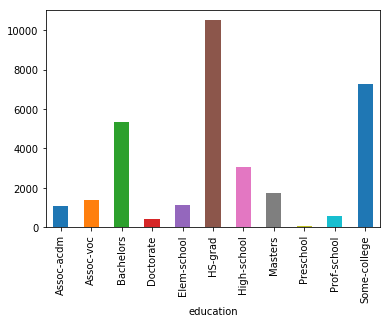

In [12]:
adult_data.groupby('education').size().plot.bar(x='education')

Q9.
* Group the `adult_data` using the `marital-status` column. You may want to look at the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).
* Display the mean, median and standard deviation statistics of `hours-per-week` column for each `marital-status` column.
* As a comment, note which marital status category has the maximum average work hours per week? Which has the most variability in work hours per week? 

In [13]:
print('Mean hours-per-week for each marital status:')
print(adult_data.groupby('marital-status').mean()['hours-per-week'])
print()
print('Median hours-per-week for each marital status:')
print(adult_data.groupby('marital-status').median()['hours-per-week'])
print()
print('Standard deviation of hours-per-week for each marital status:')
print(adult_data.groupby('marital-status').std()['hours-per-week'])
print()
#The highest average hours per week for a marital status are the Married-civ-spouses.
#The largest variance in hours per week for a marital status are the Married-AF-spouses.

Mean hours-per-week for each marital status:
marital-status
Divorced                 41.246680
Married-AF-spouse        41.130435
Married-civ-spouse       43.284856
Married-spouse-absent    39.669856
Never-married            36.939998
Separated                39.301463
Widowed                  32.979859
Name: hours-per-week, dtype: float64

Median hours-per-week for each marital status:
marital-status
Divorced                 40
Married-AF-spouse        40
Married-civ-spouse       40
Married-spouse-absent    40
Never-married            40
Separated                40
Widowed                  40
Name: hours-per-week, dtype: int64

Standard deviation of hours-per-week for each marital status:
marital-status
Divorced                 10.676632
Married-AF-spouse        19.440596
Married-civ-spouse       11.905047
Married-spouse-absent    11.767374
Never-married            12.432542
Separated                10.377534
Widowed                  14.058690
Name: hours-per-week, dtype: float64



In [14]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

Q10. Using the dictionary provided above, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for dataframes. Display the head of the new dataframe.

In [15]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()
# add the new column to adult_data_copy
cont_col = adult_data_copy['native-country'].copy()
cont_col = cont_col.map(continent_dict)
adult_data_copy.insert(14,'continent',cont_col)
adult_data = adult_data_copy
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,continent,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,North-America,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,North-America,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,North-America,<=50K
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,North-America,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,North-America,<=50K


Q11. Use matplotlib to plot a bar graph showing the average age of adults from each continent, and show the standard deviation on the same graph.

An example bar plot.
<img src="imgs/screen3.png">

<BarContainer object of 5 artists>

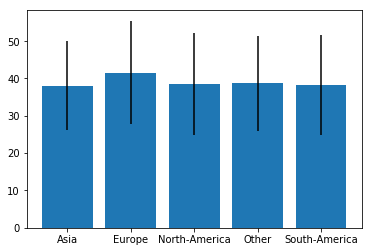

In [16]:
x = adult_data.groupby('continent').mean()['age'].index
y = adult_data.groupby('continent').mean()['age'].values
stds = adult_data.groupby('continent').std()['age'].values
plt.bar(x,y,yerr=stds)

Q12. To reduce the dimensionality of this dataset, which attribute or attributes would you eliminate? Explain why.

In [17]:
'''I would remove one of the "education" or "education-num" columns, because they are directly related and one can be determined from the other. I would also remove the "relationship" column because it can be determined by "marital-status" and "gender". '''

'I would remove one of the "education" or "education-num" columns, because they are directly related and one can be determined from the other. I would also remove the "relationship" column because it can be determined by "marital-status" and "gender". '